# Effects of Eating Habits on Body Mass Index of People with Different Family Overweight History Conditions in Obesity

Group Project Final Report: 

Daniel Lee, Edison le, Harvey Chan, Tracy Wang

## $\mathrm{I}$. Introduction
As the issue of obesity remains an ongoing topic of discussion, its steady rise presents notable hurdles to individuals' health and well-being, such as the development of abdominal obesity, type 2 diabetes, and hypertension (James, 2008). Thus ideas regarding how to maintain obesity levels to the optimal population BMI of around 21 (James, 2008) are developed through research on certain lifestyle choices like eating habits and physical activity (Palechor, 2019). Furthermore, more recent studies targeting a family history of obesity suggest that overweight/obesity can start in early childhood and give a harder challenge to effective weight loss (Corica, 2018) (James, 2008). To understand the relationship between certain lifestyle choices and obesity, we explore the effects of eating habits on obesity levels, measured by Body Mass Index (BMI), while drawing distinctions between individuals with and without a familial predisposition to overweight conditions. 

We want to give different advice on eating habits to prevent obesity based on people's different family overweight history conditions. In the end, we will work to answer:

- How does eating habits affect one's BMI WITH a family overweight history of obesity?

- How does eating habits affect one's BMI WITHOUT a family overweight hisotry of obesity?

The dataset that will be used to answer the questions is downloaded from "The UC Irvine Machine Learning Repository", an open and reliable dataset provided with the paper "Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico" by Palechor and Manotas (UCI Machine Learning Repository, 2019). 
  
This dataset includes 17 attributes for estimating obesity levels in individuals from Mexico, Peru, and Colombia, aged between 14 and 61, encompassing diverse eating habits and physical conditions. 77% of the data was synthetically generated using the Weka tool and the SMOTE filter, while 23% was directly collected from users via the web platform. Data was collected through a survey on a web platform where anonymous users responded to each question. Subsequently, the information was processed, yielding 17 attributes and 2,111 records, followed by a balancing process(preprocessed including missing and atypical data deletion, and data normalization). All data was labeled to create the class variable `NObesity` based on the equation:  $\text{Body mass index} = \frac{weight}{(height)^2}$ and categorized using information from the WHO and Mexican Normativity.

- Data Source: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition
- Related article:
https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

**Explanatory Variables:**
- `Gender`: "female" or "male" -- Categorical (Nominal)
- `Age`: Numeric value -- Numerical (Continuous)
- `Height`: Numeric value in meters -- Numerical (Continuous)
- `Weight`: Numeric value in kilograms -- Numerical (Continuous)
- `family_history_with_overweight` (Has a family member suffered or suffers from overweight?): "yes" or "no" -- Categorical (Nominal)
- `FAVC` (Do you eat high caloric food frequently?): "yes" or "no" -- Categorical (Nominal)
- `FCVC` (Do you usually eat vegetables in your meals?): never(1), sometimes(2), always(3) -- Categorical (Ordinal)
- `NCP` (How many main meals do you have daily?): "Between 1 and 2", "3", or "more than 3" -- Categorical (Ordinal)
- `CAEC` (Do you eat any food between meals): "No", "Sometimes", "Frequently" or "Always" -- Categorical (Ordinal)
- `SMOKE` (Do you smoke): "yes" or "no" -- Categorical (Nominal)
- `CH2O` (How much water do you drink daily): "Less than a liter", "Between 1 and 2 L" or "More than 2 L" -- Categorical (Ordinal)
- `SCC` (Do you monitor the calories you eat daily): "yes" or "no" -- Categorical (Nominal)
- `FAF` (How often do you have physical activity): "I do not have", "1 or 2 days", "2 or 3 days" or "4 or 5 days" -- Categorical (Ordinal)
- `TUE` (How much time do you use technological devices such as cell phone, videogames, television, computer and others?): "0–2 hours", "3–5 hours" or "More than 5 hours" -- Categorical (Ordinal)
- `CALC` (how often do you drink alcohol): "I do not drink", "Sometimes", "Frequently" or "Always" -- Categorical (Ordinal)
- `MTRANS` (Which transportation do you usually use): "Automobile", "Motorbike", "Bike",  "Public Transportation", or "Walking" -- Categorical (Nominal)

**Response Variable:**
- `NObeyesdad`: The records are labeled with the class variable NObesity (Obesity Level with BMI range) 
    - Underweight: Less than 18.5
    - Normal: 18.5 to 24.9
    - Overweight: 25.0 to 29.9
    - Obesity I: 30.0 to 34.9
    - Obesity II: 35.0 to 39.9
    - Obesity III: Higher than 40
    
>Though `NObeyesdad` is the dataset's response variable, to not use the 7 level categorical NObesity variable, we opted to use the continuous variable **body mass index** (`BMI`). `BMI` is calculated with the formuala **$BMI = \frac{weight}{(height)^2}$** and is numerical continuous variable representation of obesity levels.

## $\mathrm{II}$. Methods and Results

In [1]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(digest)
library(faraway)
library(leaps)
library(mltools)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


A

In [2]:
Obesity_dataset <- read.csv("https://raw.githubusercontent.com/Dokkaebi10/STAT301_Group29/main/ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
# glimpse(Obesity_dataset)
head(Obesity_dataset)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
6,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight


### $\mathrm{II}$.a Exploratory Data Analysis (EDA)

#### $\mathrm{II}$.a.1 Clean and Wrangle data
- According to the data source website, there are no missing values in the dataset.
- Some categorical variables are of double type, so they need to be converted from numeric to character.
- Make names of some levels of variables readable.
- We want to generate our new response variable, **Body Mass Index(`BMI`)**. According to the original article, $BMI = \frac{weight}{(height)^2}$. When the body mass index of a patient is greater than 29.9, the patient is obese.
- Select the attributes,
  - BMI,
  - Family overweight history conditions
  - Number of main meals, 
  - Frequent consumption of high caloric food, 
  - Frequency of consumption of vegetables, 
  - Consumption of food between meals,  
  - Consumption of water daily

In [4]:
BMI_data <- Obesity_dataset %>%
mutate(BMI =  Weight / (Height^2),
       New_Obesity_Level = ifelse(BMI > 29.9, "Obesity", "Non_obesity")) %>%
select(-c(NObeyesdad, Height, Weight))

BMI_data <- BMI_data %>%
rename(
    family_overweight = family_history_with_overweight,
    HIGH_CAL = FAVC,
    VEGE = FCVC,
    MEALS = NCP, 
    SNEAKS = CAEC, 
    WATER = CH2O, 
    ALCOHOL = CALC, 
    cal_monitor = SCC, 
    phy_act = FAF, 
    devices = TUE,
    TRANS = MTRANS)
                           
head(BMI_data)

,Gender,Age,family_overweight,HIGH_CAL,VEGE,MEALS,SNEAKS,SMOKE,WATER,cal_monitor,phy_act,devices,ALCOHOL,TRANS,BMI,New_Obesity_Level
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,Female,21,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,24.38653,Non_obesity
2,Female,21,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,24.23823,Non_obesity
3,Male,23,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,23.76543,Non_obesity
4,Male,27,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,26.85185,Non_obesity
5,Male,22,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,28.34238,Non_obesity
6,Male,29,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,20.19509,Non_obesity


In [5]:
c_BMI_data <- BMI_data %>%
  mutate(
      # Age = round(Age),
      VEGE = as.character(round(VEGE)),
# Do you usually eat vegetables in your meals? 
# -- never(1), sometimes(2), always(3)
      MEALS = as.character(round(MEALS)),
# How many main meals do you have daily? 
# -- "less than 3", "3", or "more than 3"
      WATER = as.character(round(WATER)),
# How much water do you drink daily? 
# -- "Less than a liter", "Between 1 and 2 L" or "More than 2 L"  
      phy_act = as.character(round(phy_act)), 
# How often do you have physical activity? 
# -- "I do not have", "Sometimes", "Frequently" or "Always"  
      devices = as.character(round(devices)) 
# How much time do you use technological devices? 
# -- "0–2 hours"(0), "3–5 hours"(1) or "More than 5 hours"(2)
)

In [6]:
n_BMI_data <- c_BMI_data %>%
  mutate(
      family_overweight = fct_recode(family_overweight,
                         "No" = "no",
                         "Yes" = "yes"),
      VEGE = case_when(
          VEGE == "1" ~ "Never",
          VEGE == "2" ~ "Sometimes",
          VEGE == "3" ~ "Always"),
# Do you usually eat vegetables in your meals? 
# -- never(1), sometimes(2), always(3)
      MEALS = ifelse(MEALS > 3, "More_than_3", ifelse(MEALS == 3, "3", "Less_than_3")),
# How many main meals do you have daily? 
# -- "less than 3", "3", or "more than 3"
      SNEAKS = fct_recode(SNEAKS,
                         "Never" = "no",
                         "Sometimes" = "Sometimes",
                         "Frequently" = "Frequently",
                         "Always" = "Always"),
# Do you eat any food between meals? 
# -- "No", "Sometimes", "Frequently" or "Always"
      WATER = case_when( 
          WATER == "1" ~ "Less_than_1L",
          WATER == "2" ~ "Between_1_and_2L",
          WATER == "3" ~ "More_than_2L") ,
# How much water do you drink daily? 
# -- "Less than a liter", "Between 1 and 2 L" or "More than 2 L"  
      phy_act = case_when(
          phy_act == "0" ~ "Never",
          phy_act == "1" ~ "Sometimes",
          phy_act == "2" ~ "Frequently",
          phy_act == "3" ~ "Always"),
# How often do you have physical activity? 
# -- "I do not have", "Sometimes", "Frequently" or "Always"  
      devices =case_when( 
          devices == "0" ~ "Less_than_2h",
          devices == "1" ~ "Between_2_and_5h",
          devices == "2" ~ "More_than_5h"),

# How much time do you use technological devices? 
# -- "0–2 hours"(0), "3–5 hours"(1) or "More than 5 hours"(2)
      ALCOHOL= fct_recode(ALCOHOL, 
                         "Never" = "no",
                         "Sometimes" = "Sometimes",
                         "Frequently" = "Frequently",
                         "Always" = "Always")
)

In [7]:
eating_data <- n_BMI_data %>%
select(
    family_overweight, 
    MEALS, 
    HIGH_CAL, 
    VEGE, 
    SNEAKS, 
    WATER, 
    BMI) 
head(eating_data)

,family_overweight,MEALS,HIGH_CAL,VEGE,SNEAKS,WATER,BMI
,<fct>,<chr>,<chr>,<chr>,<fct>,<chr>,<dbl>
1,Yes,3,no,Sometimes,Sometimes,Between_1_and_2L,24.38653
2,Yes,3,no,Always,Sometimes,More_than_2L,24.23823
3,Yes,3,no,Sometimes,Sometimes,Between_1_and_2L,23.76543
4,No,3,no,Always,Sometimes,Between_1_and_2L,26.85185
5,No,Less_than_3,no,Sometimes,Sometimes,Between_1_and_2L,28.34238
6,No,3,yes,Sometimes,Sometimes,Between_1_and_2L,20.19509


#### $\mathrm{II}$.a.2 Visualization

- Visualize the distribution of BMI by different eating habits, and color their different family overweight history conditions. 
- Draw an obesity level line where BMI = 29.9. 

In [8]:
options(repr.plot.width = 11, repr.plot.height = 9)

In [9]:
# Function to create boxplot with common theme settings
create_boxplot <- function(x_var, x_label) {
  ggplot(eating_data) +
    geom_boxplot(aes(x = !!sym(x_var), y = !!sym("BMI"), color = family_overweight), width = 1) +
    geom_hline(yintercept = 29.9 ,color = 'blue',size = 0.5) +
    labs(x = x_label, y = "BMI") +
    theme(
      text = element_text(size = 10),
      plot.title = element_text(face = "bold"),
      axis.title = element_text(face = "bold"),
      legend.position = "none"
    )
}

# Create boxplots using the function for each variable
MEALS_boxplot <- create_boxplot("MEALS", "Number of Main Meals")
HIGH_CAL_boxplot <- create_boxplot("HIGH_CAL", "Frequent Consumption of High Caloric Food")
VEGE_boxplot <- create_boxplot("VEGE", "Frequency of Consumption of Vegetables")
SNEAKS_boxplot <- create_boxplot("SNEAKS", "Food between Meals")
WATER_boxplot <- create_boxplot("WATER", "Consumption of Water Daily")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


In [10]:
plot_row <- plot_grid(
    MEALS_boxplot, 
    HIGH_CAL_boxplot, 
    VEGE_boxplot, 
    SNEAKS_boxplot,  
    WATER_boxplot
)

# add the title
title <- ggdraw() + 
  draw_label(
    "Plots of BMI of Records with Different Coditions of Family Overweight History",
    fontface = 'bold', size = 15, x = 0, hjust = 0
  ) 
Plots <- plot_grid(title, plot_row, ncol = 1, rel_heights = c(0.1, 1))
# Plots

In [11]:
# Create a plot with legend 
legend_boxplot <- eating_data %>%
  ggplot() +
  geom_boxplot(aes(MEALS, BMI, color = family_overweight)) +
  labs(color = "Family Overweight History") +
  theme(
    text = element_text(size = 12),
    legend.title = element_text(face = "bold"),
    legend.position = "bottom",
  ) 

# function to extract legend from plot 
get_only_legend <- function(plot) { 
  plot_table <- ggplot_gtable(ggplot_build(plot)) 
  legend_plot <- which(sapply(plot_table$grobs, function(x) x$name) == "guide-box") 
  legend <- plot_table$grobs[[legend_plot]] 
  return(legend) 
} 
# extract legend from plot1 using above function 
legend <- get_only_legend(legend_boxplot)

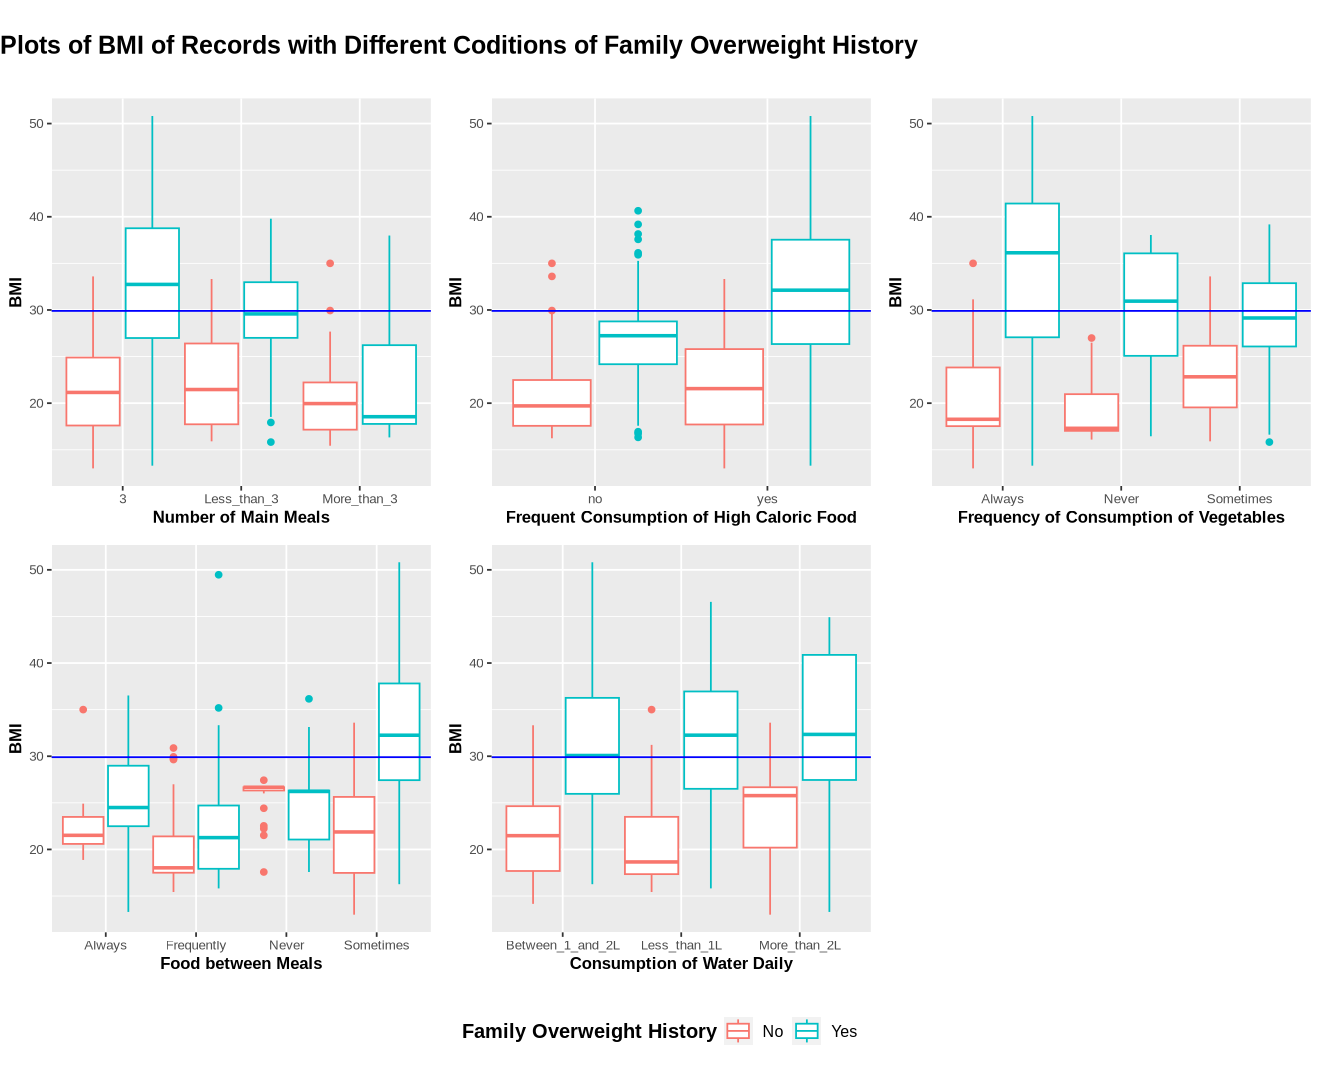

In [12]:
# final combined plot with shared legend 
grid.arrange(Plots, legend, nrow = 2, heights = c(10, 1))

#### Reasons of Plot Choice

- Considering the questions I am interested, I want to illustrate the relationship between BMI, family overweight history conditions, and 5 eating habit attributes.
- All attributes are categorical variables, so I use box plots, which can give me a distribution of BMI by different attributes.

#### Interpretations of Visualization

**BMI vs Main Meals**
- Most people have 3 meals.
- Without overweight history 
  - People's BMI doesn't change too much no matter how many meals they eat daily.
- With overweight history 
  - People having 3 meals daily have the highest BMI.
  - People having more than 3 meals daily have the lowest BMI, which is quite surprising.

**BMI vs High Caloric Food**
- People who frequently have high caloric food have higher BMI.
- With overweight history 
  - The BMI median of people who frequently have high caloric food is greater than 29.9.
  - However, luckily, the BMI median of ones who do not have much high caloric food is less than 29.9.

**BMI vs Vegetables**
- With overweight history 
  - Although we see many people who always eat vegetables have quite high BMI, the variation of this group of data is also very large. 
  - It is interesting to notice that people who never eat vegetables have relevantly higher BMI than people who sometimes eat vegetables. Moreover, the BMI median of those who never eat vegetables is above the obesity threshold.

**BMI vs Food between Meals**
- The only condition in the BMI median that is greater than the obesity level is when people with overweight history sometimes eat food between meals. However, I also noticed that the variation of this group of data is also very large because more than 80% of people in this dataset would like to take some sneaks between meals.

In [13]:
# The precentage of people who sometimes eat food between meals.
sum(eating_data$SNEAKS == "Sometimes")/nrow(eating_data)

[1] 0.8360966

**BMI vs Water**
- With overweight history 
  - Either people who drink water less than 1L or more than 2L have a relevantly higher BMI median than ones drinking water between 1L and 2L.

**General Observations and Interpretation**
- Overall, we can see people with a family overweight history have higher BMI than people without it. 
- Majority of people without history are not obese.
  - All plots illustrate that the BMI median of people without history is below the obesity threshold. 
- Therefore, it shows that family overweight history conditions significantly affect people's BMI.

### $\mathrm{II}$.b. Method and Plan

#### $\mathrm{II}$.b.1. Method: Multiple Linear Regression Analysis with Backward Selection appropriate

#### *Reason for Choosing this Method*:
1. **Assessing Attribute Impact**: Multiple linear regression allows us to evaluate the relationship between multiple predictor variables (`MEALS`, `HIGH_CAL`, `VEGE`, `WATER`, `SNEAKS`) and a continuous response variable (`BMI`). It helps quantify the impact of each attribute on `BMI` while considering other attributes' effects.

2. **Identification of Significant Factors**: This method helps determine which attributes are statistically significant in predicting `BMI` for different family overweight history conditions. It can reveal which eating habits might contribute more significantly to changes in `BMI` within different family overweight groups.

3. **Adjustment for Confounding Variables**: It enables controlling for potential confounders that might influence the relationship between eating habits and `BMI`, by including them as covariates in the regression model.

4. **Lasso and Ridge is not appropriate (according to the TA)**: Since the majority of the independent variables are categorical, we cannot use Lasso and Ridge since the coefficient cannot be "shrink".

5. **Backward prefer to forward**: Prior knowledge and research in the field of nutrition and health prove that a wide range of factors might influence BMI (e.g., dietary habits, physical activity, and family history). It should start with a full model and ensure that all variables are considered initially.

6. **Handling Multicollinearity**: By removing irrelevant variables, backward selection reduces multicollinearity, combining VIF to diagnose the final model by checking any remaining multicollinearity issues.

7. **Prediction**: Multiple regression is suitable for predicting a continuous outcome (BMI) from multiple explanatory variables, fitting well with the study's focus on lifestyle choices and personal/family history.

8. **Inference and Interpretation**: Backward selection excludes irrelevant variables, less noisy model compared to MLR. It creates a more interpretable model compared to MLR. Backward selection is more useful for identifying which lifestyle choices or personal history factors are significant predictors of BMI.

9. **Addressing Overfitting**: By eliminating variables that do not significantly improve the model, ensuring that the model generalizes well to new data.

#### *Assumptions Required for Multiple Linear Regression*:

- **Linearity**: The relationship between predictor variables (`MEALS`, `HIGH_CAL`, `VEGE`, `SNEAKS`, `WATER`) and the outcome variable (`BMI`) should be approximately linear.
- **Independence of Errors**: The residuals (errors) should be independent of each other.
- **Normality of Residuals**: The residuals should follow a normal distribution.
- **Homoscedasticity**: The variance of residuals should be constant across all levels of predictor variables.

#### *Potential Limitations or Weaknesses*:

- **Assumption Violations**: If the assumptions of linear regression are violated, the results might be biased or less reliable.
- **Correlation vs. Causation**: While regression identifies associations, it doesn't establish causation. Other unmeasured variables or confounders might influence the relationship between eating habits and `BMI`.
- **Overfitting or Underfitting**: The model might be too complex (overfitting) or too simple (underfitting), impacting its predictive capability.

#### $\mathrm{II}$.b.2. Plan:

1. **Data Preparation**: Ensure data is cleaned, missing values are handled, and categorical variables are properly encoded before conducting regression analysis. Seperate `eating_data` into two datasets: `with_history_data` and `without_history_data`.

2. **Best Model Selection**:
- Use the **backward selection** algorithm and the **adjusted $R^2$** to select a smaller model. 
- Since the same data can not be used to select and to make inference, we need 2 different datasets: a *selection* set and a *training* set. 
    - We use the data in hand and split it into a training dataset and a selection dataset on a 70-30% basis. 
      - `with_history_data` is split into `training_with`(70% of the data) and `selection_with`(30% of the data).
      - `without_history_data` is split into `training_without`(70% of the data) and `selection_without`(30% of the data).
- Select good variables for two generative models: The larger adj-$R^2$ is the better model is. 

3. **Generate Generative Models**: Use the independent datasets training_with and training_without to build and evaluate generative models.

4. **Interpretation of Results**: Evaluate the regression coefficients and p-values to determine the significance and direction of the relationships between eating habits (`MEALS`, `HIGH_CAL`, `VEGE`, `SNEAKS`, `WATER`) and `BMI` for each family overweight history group.

5. **Assessment of Model Fit**: Evaluate the overall model fit using metrics, adjusted R-squared, to understand how well the model explains the variability in `BMI`.

6. **Validation and Discussion**: Discuss the findings, considering limitations and strengths of the analysis. It's essential to interpret the results cautiously, considering the context and limitations of the chosen method.

#### $\mathrm{II}$.b.3. Implementation of proposed model

In [14]:
with_history_data <- eating_data %>%
filter(family_overweight == "Yes") %>%
select(-c(family_overweight) )

# head(with_history_data)

In [15]:
without_history_data <- eating_data %>%
filter(family_overweight == "No") %>%
select(-c(family_overweight) )

# head(without_history_data)

In [16]:
# training_with & selection_with
set.seed(123)

with_history_data$ID <- rownames(with_history_data)

training_with <- sample_n(with_history_data, size = nrow(with_history_data) * 0.70, replace = FALSE)
selection_with <- anti_join(with_history_data, training_with, by = "ID")

training_with <- training_with %>% select(-ID)
selection_with <- selection_with %>% select(-ID)

# head(training_with)
# nrow(training_with)
# head(selection_with)
# nrow(selection_with)

In [17]:
# training_without & selection_without
set.seed(122)

without_history_data$ID <- rownames(without_history_data)

training_without <- sample_n(without_history_data, size = nrow(without_history_data) * 0.70,replace = FALSE)
selection_without <- anti_join(without_history_data, training_without, by = "ID")

training_without <- training_without %>% select(-ID)
selection_without <- selection_without %>% select(-ID)

# head(training_without)
# nrow(training_without)
# head(selection_without)
# nrow(selection_without)

In [18]:
#backforward selection for with-history-model
with_backward_sel <- regsubsets(
    x= BMI~., 
    nvmax= 10,
    data= selection_with,
    method= "backward" ,
)

with_bwd_summary <- summary(with_backward_sel)

with_bwd_summary_df <- data.frame(
   n_input_variables = 1:10,
   RSQ = with_bwd_summary$rsq,
   RSS = with_bwd_summary$rss,
   ADJ.R2 = with_bwd_summary$adjr2
)

with_bwd_summary
with_bwd_summary_df

Subset selection object
Call: regsubsets.formula(x = BMI ~ ., nvmax = 10, data = selection_with, 
    method = "backward", )
10 Variables  (and intercept)
                  Forced in Forced out
MEALSLess_than_3      FALSE      FALSE
MEALSMore_than_3      FALSE      FALSE
HIGH_CALyes           FALSE      FALSE
VEGENever             FALSE      FALSE
VEGESometimes         FALSE      FALSE
SNEAKSFrequently      FALSE      FALSE
SNEAKSNever           FALSE      FALSE
SNEAKSSometimes       FALSE      FALSE
WATERLess_than_1L     FALSE      FALSE
WATERMore_than_2L     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          MEALSLess_than_3 MEALSMore_than_3 HIGH_CALyes VEGENever VEGESometimes
1  ( 1 )  " "              " "              " "         " "       " "          
2  ( 1 )  " "              " "              " "         " "       "*"          
3  ( 1 )  " "              "*"              " "         " "       "*"          
4  ( 1 )  " "              "*"    

n_input_variables,RSQ,RSS,ADJ.R2
<int>,<dbl>,<dbl>,<dbl>
1,0.1473823,26105.02,0.1457299
2,0.2857226,21869.39,0.2829487
3,0.3609943,19564.75,0.3572647
4,0.3804893,18967.87,0.3756588
5,0.4003428,18360.00,0.3944868
6,0.4154508,17897.43,0.4085872
7,0.4232840,17657.60,0.4153683
8,0.4236742,17645.65,0.4146161
9,0.4239285,17637.87,0.4137225


In [19]:
#backforward selection for without-history-model
without_backward_sel <- regsubsets(
    x= BMI~., 
    nvmax= 10,
    data= selection_without,
    method= "backward" ,
)

without_bwd_summary <- summary(without_backward_sel)

without_bwd_summary_df <- data.frame(
   n_input_variables = 1:10,
   RSQ = without_bwd_summary$rsq,
   RSS = without_bwd_summary$rss,
   ADJ.R2 = without_bwd_summary$adjr2
)

without_bwd_summary
without_bwd_summary_df

Subset selection object
Call: regsubsets.formula(x = BMI ~ ., nvmax = 10, data = selection_without, 
    method = "backward", )
10 Variables  (and intercept)
                  Forced in Forced out
MEALSLess_than_3      FALSE      FALSE
MEALSMore_than_3      FALSE      FALSE
HIGH_CALyes           FALSE      FALSE
VEGENever             FALSE      FALSE
VEGESometimes         FALSE      FALSE
SNEAKSFrequently      FALSE      FALSE
SNEAKSNever           FALSE      FALSE
SNEAKSSometimes       FALSE      FALSE
WATERLess_than_1L     FALSE      FALSE
WATERMore_than_2L     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          MEALSLess_than_3 MEALSMore_than_3 HIGH_CALyes VEGENever VEGESometimes
1  ( 1 )  " "              " "              " "         " "       "*"          
2  ( 1 )  " "              " "              " "         " "       "*"          
3  ( 1 )  " "              " "              " "         "*"       "*"          
4  ( 1 )  " "              " " 

n_input_variables,RSQ,RSS,ADJ.R2
<int>,<dbl>,<dbl>,<dbl>
1,0.09873176,1828.555,0.0908259
2,0.16350078,1697.147,0.1486955
3,0.18462888,1654.281,0.1627886
4,0.20042519,1622.232,0.1716117
5,0.20459943,1613.763,0.1684449
6,0.20795005,1606.965,0.1643510
7,0.20961711,1603.583,0.1583886
8,0.21067870,1601.429,0.1516640
9,0.21187552,1599.001,0.1449593


***Observations and Selection of Variables for Generative Models***:
- **With-History-Model**: The results indicate that Model 7 possesses the highest adjusted R-squared value, suggesting it may explain the variability of the response data best while using fewer predictors. In the backward selection process, categorical variables with multiple levels are considered individually. Model 7 recommends including the variables `SNEAKSSometimes` and `SNEAKSFrequently` but not the `SNEAKSNever` variable, which leads to a loss of model interpretability and it is a statistically inappropriate approach. 

- **Without-History-Model**: The results indicate that Model 4 possesses the highest adjusted R-squared value. However, Model 4 recommends including the `SNEAKSSometimes` and `SNEAKSNever` variable but not the `SNEAKSFrequently` variable, which leads to a loss of model interpretability and it is a statistically inappropriate approach.

- Heeding our professor's advice, we should treat categorical variables with multiple levels as a single entity. If any level of such a variable is significant (denoted by a star) in the backward selection process, the entire variable should be included. 

  - Consequently, our final **with-history-model** will incorporate the variables from Model 7, with the addition of `SNEAKSNever`, aligning with the variable selection of Model 8. 
  - Our final **without-history-model** will incorporate the variables from Model 4, with the addition of `SNEAKSFrequently`. This approach will ensure we maintain the interpretability of our model in relation to the categorical variables.

>For robustness check, we then implement the StepAIC backward selection method: StepAIC is a backward selection method that treats category variables with multiple levels as a whole to make the selection or drop decision:

In [20]:
library(MASS)

# WITH HISTORY MODEL CHECK
# Fit the initial full model
full_model_with <- lm(BMI ~ ., data = selection_with)

# Perform stepwise model selection based on AIC
backward_sel_with <- stepAIC(full_model_with, direction = "backward")

# Summary of the selected model
bwd_summary_with <- summary(backward_sel_with)

# Creating a data frame from the summary
bwd_summary_df_with <- data.frame(
    RSQ = bwd_summary_with$r.squared,
    RSS = sum(bwd_summary_with$residuals^2),
    ADJ.R2 = bwd_summary_with$adj.r.squared
)
bwd_summary_df_with

final_model_formula_with <- formula(backward_sel_with)
print(paste("The final with-history-model is", deparse(final_model_formula_with)))


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Start:  AIC=1849.28
BMI ~ MEALS + HIGH_CAL + VEGE + SNEAKS + WATER

           Df Sum of Sq   RSS    AIC
- WATER     2      12.3 17646 1845.6
<none>                  17633 1849.3
- HIGH_CAL  1     741.6 18375 1868.6
- MEALS     2    2937.5 20571 1925.1
- SNEAKS    3    3772.8 21406 1943.7
- VEGE      2    3718.1 21351 1944.4

Step:  AIC=1845.64
BMI ~ MEALS + HIGH_CAL + VEGE + SNEAKS

           Df Sum of Sq   RSS    AIC
<none>                  17646 1845.6
- HIGH_CAL  1     744.8 18390 1865.1
- MEALS     2    2933.7 20579 1921.3
- SNEAKS    3    3861.3 21507 1942.2
- VEGE      2    3996.1 21642 1947.4


RSQ,RSS,ADJ.R2
<dbl>,<dbl>,<dbl>
0.4236742,17645.65,0.4146161


[1] "The final with-history-model is BMI ~ MEALS + HIGH_CAL + VEGE + SNEAKS"


In [21]:
# WITHOUT HISTORY MODEL CHECK
# Fit the initial full model
full_model_without <- lm(BMI ~ ., data = selection_without)

# Perform stepwise model selection based on AIC
backward_sel_without <- stepAIC(full_model_without, direction = "backward")

# Summary of the selected model
bwd_summary_without <- summary(backward_sel_without)

# Creating a data frame from the summary
bwd_summary_df_without <- data.frame(
    RSQ = bwd_summary_without$r.squared,
    RSS = sum(bwd_summary_without$residuals^2),
    ADJ.R2 = bwd_summary_without$adj.r.squared
)
bwd_summary_df_without

final_model_formula_without <- formula(backward_sel_without)
print(paste("The final without-history-model is", deparse(final_model_formula_without)))

detach("package:MASS", unload=TRUE)

Start:  AIC=326.31
BMI ~ MEALS + HIGH_CAL + VEGE + SNEAKS + WATER

           Df Sum of Sq    RSS    AIC
- MEALS     2     4.583 1603.3 322.64
- WATER     2    13.132 1611.9 323.26
- HIGH_CAL  1     4.871 1603.6 324.66
<none>                  1598.7 326.31
- SNEAKS    3   141.590 1740.3 330.16
- VEGE      2   131.593 1730.3 331.49

Step:  AIC=322.64
BMI ~ HIGH_CAL + VEGE + SNEAKS + WATER

           Df Sum of Sq    RSS    AIC
- WATER     2    13.213 1616.5 319.60
- HIGH_CAL  1     6.482 1609.8 321.11
<none>                  1603.3 322.64
- SNEAKS    3   157.238 1760.5 327.50
- VEGE      2   137.377 1740.7 328.18

Step:  AIC=319.6
BMI ~ HIGH_CAL + VEGE + SNEAKS

           Df Sum of Sq    RSS    AIC
- HIGH_CAL  1     5.703 1622.2 318.00
<none>                  1616.5 319.60
- SNEAKS    3   179.168 1795.7 325.79
- VEGE      2   149.406 1765.9 325.85

Step:  AIC=318
BMI ~ VEGE + SNEAKS

         Df Sum of Sq    RSS    AIC
<none>                1622.2 318.00
- SNEAKS  3    174.44 1796.7 32

RSQ,RSS,ADJ.R2
<dbl>,<dbl>,<dbl>
0.2004262,1622.23,0.164082


[1] "The final without-history-model is BMI ~ VEGE + SNEAKS"


Warning message:
“‘MASS’ namespace cannot be unloaded:
  namespace ‘MASS’ is imported by ‘lme4’ so cannot be unloaded”


***Generate Generative Models***

In [22]:
#use the independent dataset `training_with` to build and evaluate a generative with-history-model. 
with_bwd_generative <- lm(BMI ~ .,
  data = select(training_with, BMI, MEALS, HIGH_CAL, VEGE, SNEAKS)
)
summary_with <- tidy(with_bwd_generative)

In [23]:
#use the independent dataset `training_without` to build and evaluate a generative without-history-model. 
without_bwd_generative <- lm(BMI ~ .,
  data = select(training_without, BMI, VEGE, SNEAKS)
)
summary_without <- tidy(without_bwd_generative)

In [24]:
summary_with
glance(with_bwd_generative)$adj.r.squared
summary_without
glance(without_bwd_generative)$adj.r.squared

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),24.320990,1.5802365,15.390727,6.496776e-49
MEALSLess_than_3,-2.625057,0.4236809,-6.195834,7.955886e-10
MEALSMore_than_3,-8.186960,0.7448542,-10.991359,7.649575e-27
HIGH_CALyes,3.890289,0.6280300,6.194431,8.024850e-10
VEGENever,-3.874981,0.8497056,-4.560380,5.629604e-06
VEGESometimes,-4.205943,0.3559667,-11.815551,1.492060e-30
SNEAKSFrequently,-2.250740,1.6089246,-1.398909,1.620988e-01
SNEAKSNever,3.715471,2.2322190,1.664474,9.627898e-02
SNEAKSSometimes,7.700856,1.4752608,5.219996,2.107255e-07


[1] 0.3413835

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),22.4402190,0.9421300,23.8186005,1.307689e-67
VEGENever,-1.1833799,0.9030842,-1.3103761,1.912118e-01
VEGESometimes,0.8008084,0.5163383,1.5509375,1.221192e-01
SNEAKSFrequently,-3.0534094,1.0234527,-2.9834396,3.118126e-03
SNEAKSNever,3.1006614,1.2666676,2.4478888,1.502372e-02
SNEAKSSometimes,-0.7844076,0.9838564,-0.7972785,4.260085e-01


[1] 0.1793059

***Interpretation of Fitted Model -- Inferences***

##### **With-History-Model**
**At a significance level of 0.05**,
- **Base line**: the mean value of BMI with 3 main meals, not frequently eating high Calorie food, always eating vegetables, always eating food between meals. The p-value of it is extremely small, so all variables involved are statistically significant predictors.
- `SNEAKS`: p-values of `SNEAKSFrequently` (0.162) and `SNEAKSNever`(0.096) are greater than 0.05, however, p-value of `SNEAKSSometimes` are smaller than 0.05, so we still can conclude that `SNEAKS` has statistically significant effect on `BMI`. 
- The rest variables are statistically associated with `BMI`, since their p-value is much lower than significance level. Therefore, we can say attributes, number of main meals (`MEALS`), frequent consumption of high caloric food (`HIGH_CAL`) and frequency of consumption of vegetables (`VEGE`), are statistically significant predictors of `BMI`.

**adj-$R^2$ Value**
- An adj-$R^2$ value of 0.34138 indicates that approximately 34.138% of the variance in the `BMI` variable is explained by the independent variables (`MEALS`, `HIGH_CAL`, `VEGE`, `SNEAKS`) included in the selected model. 
- It signifies that the model, which includes `MEALS`, `HIGH_CAL`, `VEGE` and `SNEAKS` as predictor variables, has a monderately poor ability to predict and explain variations in BMI.

##### **Without-History-Model**
**At a significance level of 0.05**,
- **Base line**: the mean value of BMI with always eating vegetables and always eating food between meals. The p-value of it is extremely small, so it is statistically siginificant.

- `VEGE`
  - Since p-values of `VEGENever` (0.191) and `VEGESometimes`(0.122) are greater than 0.05, we fail to reject null hypothesis that, with always eating vegetables and always eating food between meals, the mean numbers of BMI with `VEGENever` and `VEGESometimes` are equal to that with `VEGEAlways` respectively. Therefore, `VEGENever` and `VEGESometimes` are not statistically significant predictors. 

- `SNEAKS`
  - p-values of `SNEAKSSometimes` (0.426) is greater than 0.05, however, p-values of `SNEAKSFrequently` (0.0031) and `SNEAKSNever` (0.0152) are lower than 0.05, so we can still conclude that `SNEAKS` has a statiscally significant effect on `BMI` and its dummy variables are statistically significant predictors.

**$adj-R^2$ Value**
- An $adj-R^2$ value of 0.17931 indicates that approximately 17.931% of the variance in the `BMI` variable is explained by the independent variables (`VEGE`, `SNEAKS`) included in the selected model.
- It signifies that the model, which includes`VEGE` and `SNEAKS` as predictor variables, has a poor ability to predict and explain variations in BMI.

##  $\mathrm{III}$. Discussion

### $\mathrm{III}$.1. How attributes of eating habits affect one's BMI? 
After variable selection using backward selection and further verification using Step AIC backward selection, we can conclude that that:

#### For people with family overweight history, 
- the frequency of having main meals (`MEALS`), high caloric food (`HIGH_CAL`), vegetables (`VEGE`), and food between meals (`SNEAKS`) are statistically significant in determining one's Body Mass Index. 

- A person that eats 3 meals a day, do not eat high caloric food, always get vegetables and always have food between meals would have an average BMI score of 24.32 (reference). 
    > If the person eats less than 3 meals, keeping other variables constant as reference, their average BMI decreases by 2.63 unit. On the other hand, if they eat more than 3 meals a day, their average BMI decreases by 8.19 unit. 
    
    > If the person consumes high caloric food, keeping other variables constant as reference, their average BMI increases by 3.89 unit. 
    
    > If the person never eats vegetable, keeping other variables constant as reference, their average BMI decreases by 3.87 unit and if they sometimes eat vegetable, their average BMI decreases by 4.20 unit. 
    
    > If the person has food between meals frequently, keeping other variables constant as reference, their average BMI decreases by 2.25 unit. However, it would increase by 3.72 unit if they never have food between meals and increase by 7.70 unit if they sometimes have food between meals. 
    
- These findings underscore the intricate relationship between eating habits and BMI. Eating three meals a day, avoiding high-calorie foods, consistently having vegetables, and snacking moderately between meals appears to maintain an average BMI of 24.32. Altering these habits can significantly impact BMI: skipping meals leads to decreased BMI, while consuming more than three meals increases it substantially. Introducing high-caloric foods escalates BMI, while neglecting vegetables has a negative effect. Surprisingly, frequent snacking between meals correlates with a lower BMI, whereas abstaining or irregularly indulging in snacks leads to higher BMI. These implications highlight the importance of balanced eating habits, suggesting that moderation, regularity in meals, and a focus on nutrient-dense foods like vegetables play pivotal roles in weight management.

- Approximately 34.138% of the variance in the `BMI` variable is explained by the independent variables (`MEALS`, `HIGH_CAL`, `VEGE`, `SNEAKS`) included in the selected model, so we also encourage people to focuse on optimizing eating habits while constantly exploring other healthy lifestyles that are more suitable for themselves.

#### For people without family overweight history, 
- The frequency of having vegetables (`VEGE`) is not statistically significant in determining one's Body Mass Index while food between meals (`SNEAKS`) is. However, we will discuss the results based on coefficients of both variables.  

- A person that always get vegetables and always have food between meals would have an average BMI score of 24.32 (reference). 
    
    > If the person never eats vegetable, keeping other variables constant as reference, their average BMI decreases by 1.18 unit and if they sometimes eat vegetable, their average BMI increases by 0.801 unit. 
    
    > If the person has food between meals frequently, keeping other variables constant as reference, their average BMI decreases by 3.05 unit. However, it would increase by 3.10 unit if they never have food between meals and decrease by 0.78 unit if they sometimes have food between meals. 
    
- We can notice that people who frequently eat food bewteen meals and always eat vegitables has lowest BMI. This suggests that people are allowed to have a certain amount of food between meals but they still should not consume too much. It is very recommended to consume as much vegetables as possible. 
- Moreover, since only approximately 17.931% of the variance in the `BMI` variable is explained by the independent variables (`VEGE`, `SNEAKS`) included in the selected model, this indicates that eating habits are not the main factor affecting avoiding obesity. Therefore, we encourage people to explore more suitable ways to maintain a healthy lifestyle.

### $\mathrm{III}$.2. The model could be improved with: 
- Feature Engineering: Transforming categorical variables into numerical representations allows for more comprehensive analysis. For instance, converting `FCVC` (vegetable consumption) and `CAEC` (food between meals) into ordinal scales can capture the frequency and create a more detailed analysis. 

- Interaction Terms: Exploring interactions between attributes could reveal hidden relationships affecting BMI. For example, assessing how food between meals (`SNEAKS`) interacts with high caloric food (`HIGH_CAL`) might unveil statistically significant effects on BMI.

### $\mathrm{III}$.3. Future research this study could lead to:
- This study paves the way for delving into the long-term effects of these habits on overall health markers beyond BMI, such as cardiovascular health or metabolic syndrome, could offer valuable insights into holistic well-being. Moreover, understanding cultural influences on eating behaviors and their impact on BMI across diverse populations could unveil intriguing variations and aid in tailoring more targeted interventions for healthy living.

##  $\mathrm{IV}$. References

Corica, D., Aversa, T., Valenzise, M., Messina, M. F., Alibrandi, A., De Luca, F., &amp; Wasniewska, M. (2018, April 6). Does family history of obesity, cardiovascular, and metabolic diseases influence onset and severity of childhood obesity?. Frontiers. https://doi.org/10.3389%2Ffendo.2018.00187 

James, W. P. (2008). The epidemiology of obesity: The size of the problem. Journal of Internal Medicine, 263(4), 336–352. https://doi.org/10.1111/j.1365-2796.2008.01922.x 

Palechor, F. M., &amp; Manotas, A. de. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 25, 104344. https://doi.org/10.1016/j.dib.2019.104344 

UCI Machine Learning Repository. (2019). Estimation of Obesity Levels Based on Eating Habits and Physical Condition. https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition